# Reglas de Asociacion Usando Algoritmo **Apriori**

Este programa aplica el algoritmo apriori al problema de la "canasta de compra" de un set de transacciones y el cálculo de las métricas de asociación:

In [1]:
# !pip install apyori

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori

Ahora importamos el data set: "store_data"

In [3]:
store_data = pd.read_csv('store_data.csv')

Llamemos a la función head() para ver cómo se ve el conjunto de datos:

In [4]:
store_data.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Si observa detenidamente los datos, podemos ver que el encabezado es en realidad la primera transacción. Cada fila corresponde a una transacción y cada columna corresponde a un artículo comprado en esa transacción específica. El NaN nos dice que el artículo representado por la columna no fue comprado en esa transacción específica.

En este conjunto de datos no hay ninguna fila de encabezado. Pero, de forma predeterminada, la función pd.read_csv trata la primera fila como encabezado. Para deshacerse de este problema, agregue la opción header=None a la función pd.read_csv, como se muestra a continuación:

In [5]:
store_data = pd.read_csv('store_data.csv', header=None)
store_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Proprocessing

La biblioteca Apriori que vamos a usar requiere que nuestro conjunto de datos tenga la forma de una lista de listas, donde todo el conjunto de datos es una lista grande y cada transacción en el conjunto de datos es una lista interna dentro de la lista grande externa. Actualmente tenemos datos en forma de marco de datos de pandas. Para convertir nuestro marco de datos de pandas en una lista de listas, ejecute el siguiente script:

In [6]:
records = []
for i in range(0, 7501):
    records.append([str(store_data.values[i,j]) for j in range(0, 20)])

## Aplicando el Algoritmo Apriori

El siguiente paso es aplicar el algoritmo Apriori en el conjunto de datos. Para hacerlo, podemos usar la clase a priori que importamos de la biblioteca apyori.

La clase a priori requiere algunos valores de parámetros para funcionar. El primer parámetro es la lista de lista de la que desea extraer reglas. El segundo parámetro es el parámetro min_support. Este parámetro se utiliza para seleccionar los elementos con valores de soporte superiores al valor especificado por el parámetro. A continuación, el parámetro min_confidence filtra aquellas reglas que tienen una confianza superior al umbral de confianza especificado por el parámetro. De manera similar, el parámetro min_lift especifica el valor de elevación mínimo para las reglas preseleccionadas. Finalmente, el parámetro min_length especifica la cantidad mínima de elementos que desea en sus reglas.

Supongamos que queremos reglas solo para aquellos artículos que se compran al menos 5 veces al día, o 7 x 5 = 35 veces en una semana, ya que nuestro conjunto de datos es para un período de una semana. El soporte para esos artículos se puede calcular como 35/7500 = 0.0045. La confianza mínima para las reglas es 20% o 0.2. De manera similar, especificamos el valor de lift como 3 y finalmente min_length es 2 ya que queremos al menos dos productos en nuestras reglas. Estos valores en su mayoría se eligen arbitrariamente, por lo que puede jugar con estos valores y ver qué diferencia hace en las reglas que recupera.

In [7]:
association_rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
association_results = list(association_rules)

En la segunda línea aquí convertimos las reglas encontradas por la clase a priori en una lista ya que es más fácil ver los resultados de esta forma.

## Visualización de Resultados:

Primero encontremos el número total de reglas extraídas por la clase a priori. Ejecute el siguiente script:

In [8]:
print(len(association_results))

48


El script anterior debería devolver 48. Cada elemento corresponde a una regla.

Imprimamos el primer elemento de la lista Association_rules para ver la primera regla. Ejecute el siguiente script:

In [9]:
print(association_results[0])

RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)])


El primer elemento de la lista es una lista que contiene tres elementos. El primer elemento de la lista muestra los artículos de abarrotes de la regla.

Por ejemplo, desde el primer artículo, podemos ver que la crema ligera y el pollo se compran comúnmente juntos. Esto tiene sentido ya que las personas que compran crema ligera tienen cuidado con lo que comen, por lo que es más probable que compren pollo, es decir, carne blanca, en lugar de carne roja, es decir, carne de res. O esto podría significar que la crema ligera se usa comúnmente en las recetas de pollo.

El valor de soporte para la primera regla es 0.0045. Este número se calcula dividiendo el número de transacciones que contienen crema ligera entre el número total de transacciones. El nivel de confianza de la regla es 0,2905, lo que muestra que de todas las transacciones que contienen crema ligera, el 29,05 % de las transacciones también contienen pollo. Finalmente, el aumento de 4.84 nos dice que los clientes que compran crema light tienen 4.84 veces más probabilidades de comprar pollo en comparación con la probabilidad predeterminada de la venta de pollo.

La siguiente secuencia de comandos muestra la regla, Support, Confidence y Lift de manera más clara:

In [10]:
for item in association_results:

    pair = item[0]
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    print("Support: " + str(item[1]))

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: light cream -> chicken
Support: 0.004532728969470737
Confidence: 0.29059829059829057
Lift: 4.84395061728395
Rule: mushroom cream sauce -> escalope
Support: 0.005732568990801226
Confidence: 0.3006993006993007
Lift: 3.790832696715049
Rule: escalope -> pasta
Support: 0.005865884548726837
Confidence: 0.3728813559322034
Lift: 4.700811850163794
Rule: herb & pepper -> ground beef
Support: 0.015997866951073192
Confidence: 0.3234501347708895
Lift: 3.2919938411349285
Rule: tomato sauce -> ground beef
Support: 0.005332622317024397
Confidence: 0.3773584905660377
Lift: 3.840659481324083
Rule: whole wheat pasta -> olive oil
Support: 0.007998933475536596
Confidence: 0.2714932126696833
Lift: 4.122410097642296
Rule: shrimp -> pasta
Support: 0.005065991201173177
Confidence: 0.3220338983050847
Lift: 4.506672147735896
Rule: light cream -> nan
Support: 0.004532728969470737
Confidence: 0.29059829059829057
Lift: 4.84395061728395
Rule: shrimp -> frozen vegetables
Support: 0.005332622317024397
Confidence

Ya hemos discutido la primera regla. Analicemos ahora la segunda regla. La segunda regla establece que mushroom cream sauce y el escalope se compran con frecuencia. El soporte para mushroom cream sauce es 0,0057. La confianza para esta regla es 0,3006, lo que significa que, de todas las transacciones que contienen hongos, es probable que el 30,06 % de las transacciones también contengan escalope. Finalmente, el aumento de 3,79 muestra que el escalope tiene 3,79 más probabilidades de ser comprado por los clientes que compran cream sauce, en comparación con su venta predeterminada.

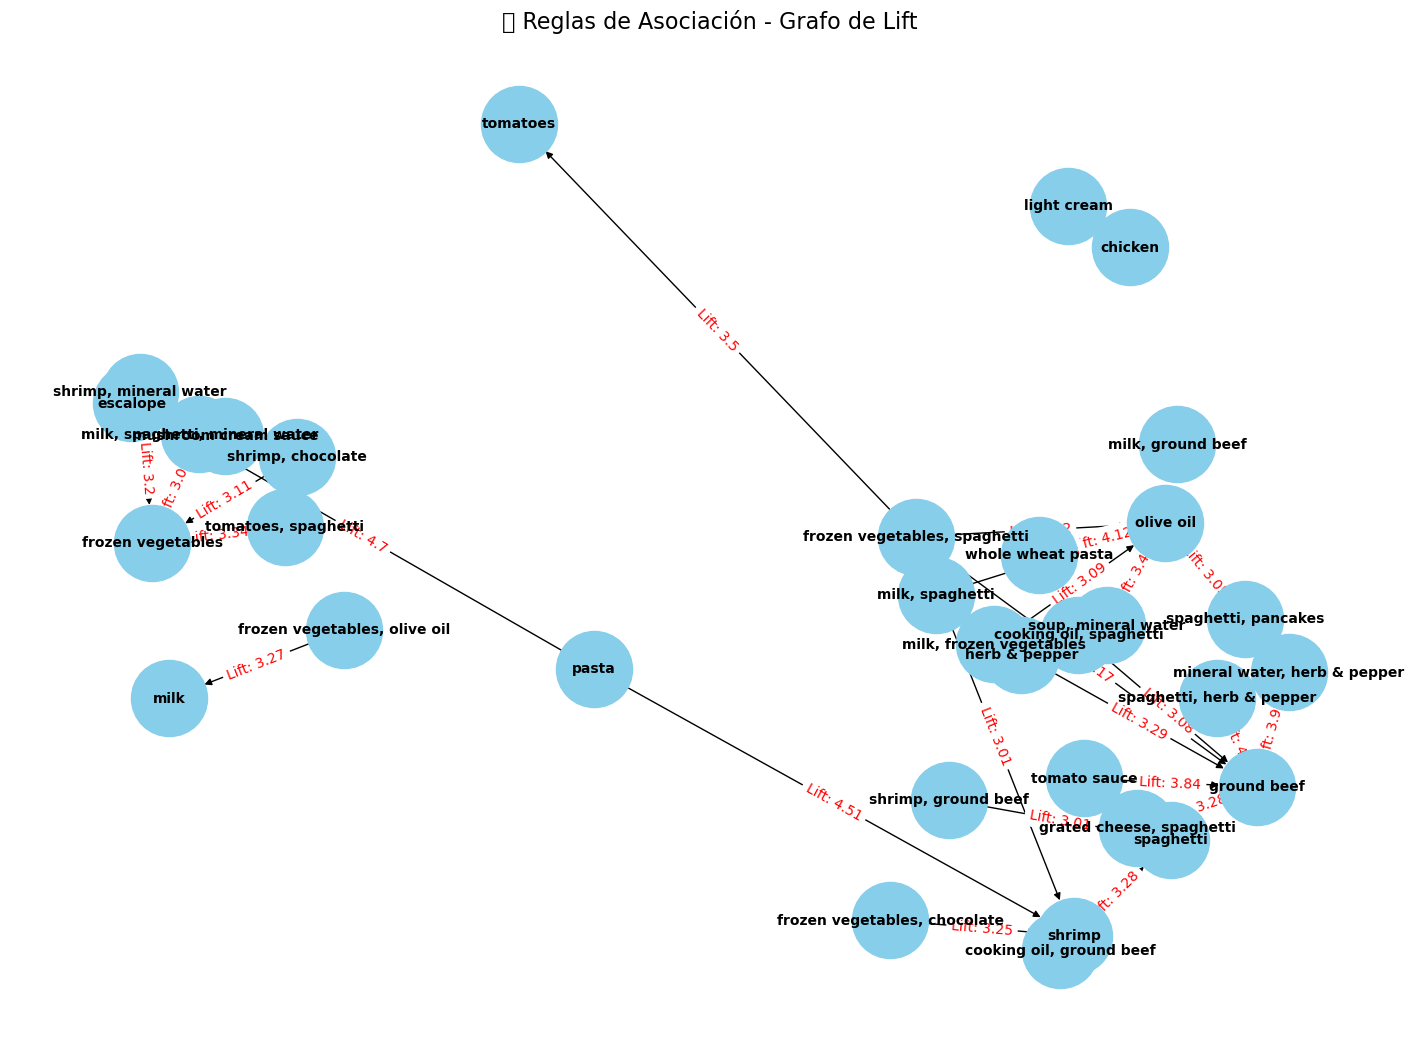

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

# Paso 6: Crear un grafo dirigido para visualizar las reglas
G = nx.DiGraph()

for result in association_results:
    for rule in result.ordered_statistics:
        base_items = list(rule.items_base)
        add_items = list(rule.items_add)

        # Saltar reglas si contienen "nan"
        if any("nan" in str(x).lower() for x in base_items + add_items):
            continue

        base = ", ".join(base_items)
        add = ", ".join(add_items)
        lift = round(rule.lift, 2)
        G.add_edge(base, add, weight=lift, label=f"Lift: {lift}")


# Paso 7: Visualizar el grafo
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, k=0.5, seed=42)

nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue",
        font_size=10, font_weight='bold', arrows=True)

edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.title("📊 Reglas de Asociación - Grafo de Lift", fontsize=16)
plt.axis('off')
plt.show()


In [17]:
# Extraer reglas en formato tabular
rules_data = []

for result in association_results:
    for rule in result.ordered_statistics:
        base_items = list(rule.items_base)
        add_items = list(rule.items_add)

        # Filtrar reglas que contienen "nan"
        if any("nan" in str(x).lower() for x in base_items + add_items):
            continue

        rules_data.append({
            "Base": ", ".join(base_items),
            "Consecuente": ", ".join(add_items),
            "Soporte": round(result.support, 4),
            "Confianza": round(rule.confidence, 4),
            "Lift": round(rule.lift, 4)
        })

# Crear DataFrame
df_rules = pd.DataFrame(rules_data)

# Ordenar por Lift descendente
df_rules_sorted = df_rules.sort_values(by="Lift", ascending=False)

# Mostrar las top 10 reglas
df_rules_sorted.head(10)


,Base,Consecuente,Soporte,Confianza,Lift
0,light cream,chicken,0.0045,0.2906,4.8440
2,pasta,escalope,0.0059,0.3729,4.7008
6,pasta,shrimp,0.0051,0.3220,4.5067
5,whole wheat pasta,olive oil,0.0080,0.2715,4.1224
21,"spaghetti, herb & pepper",ground beef,0.0064,0.3934,4.0044
20,"mineral water, herb & pepper",ground beef,0.0067,0.3906,3.9757
4,tomato sauce,ground beef,0.0053,0.3774,3.8407
1,mushroom cream sauce,escalope,0.0057,0.3007,3.7908
17,"frozen vegetables, spaghetti",tomatoes,0.0067,0.2392,3.4980
25,"soup, mineral water",olive oil,0.0052,0.2254,3.4230
